<a href="https://colab.research.google.com/github/imyeeun/toyProject/blob/master/%EB%B3%B4%EC%8A%A4%ED%86%A4_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1_%EB%A0%88%ED%8F%AC%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **보스톤 집값 예측 보고서**


---
1. 적절한 람다값 파악
2. 그래프로 표현


**1. 라이브러리 임포팅**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True) # Suppress = True로 할경우 10의 -1승이 아닌 0.1으로 나옴

from sklearn.datasets import load_boston

**2.데이터 준비하기**

In [0]:
# 과제 - 보스톤 집값 예측, 레포트 인쇄하기..(적절한 람다값 찾아서 보고서 제출, 그래프, 코드, 계산 다 있어야 함. 오늘의 프로세스에 맞게.))
boston = load_boston()
X = boston.data
y = boston.target

In [0]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
# feature는 506개의 row, 13개의 column 으로 구성
X.shape

(506, 13)

In [0]:
X

array([[  0.0063,  18.    ,   2.31  , ...,  15.3   , 396.9   ,   4.98  ],
       [  0.0273,   0.    ,   7.07  , ...,  17.8   , 396.9   ,   9.14  ],
       [  0.0273,   0.    ,   7.07  , ...,  17.8   , 392.83  ,   4.03  ],
       ...,
       [  0.0608,   0.    ,  11.93  , ...,  21.    , 396.9   ,   5.64  ],
       [  0.1096,   0.    ,  11.93  , ...,  21.    , 393.45  ,   6.48  ],
       [  0.0474,   0.    ,  11.93  , ...,  21.    , 396.9   ,   7.88  ]])

In [0]:
# target 또한 506개의 row 
y.shape

(506,)

In [0]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [0]:
# 컬럼명 확인 
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

**3. 모델 생성 및 교차 검증**

In [0]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_validate

In [0]:
# alpha 값을 담는 리스트 생성
lambdas = np.arange(0, 1000, 1)

In [0]:
test_score=[]
train_score = []
kfold = KFold(n_splits=5) # 5-fold 수행

for i in lambdas:
  reg = Ridge(alpha = i)
  temp = cross_validate(reg, X, y, cv = kfold,
                        scoring = 'neg_mean_squared_error',
                        return_train_score = True) # training error를 기록한다.
  
  train_score.append(-1 * temp['train_score'].mean())
  test_score.append(-1 * temp['test_score'].mean())
    

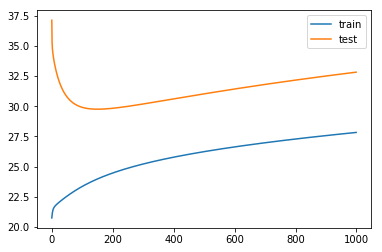

In [0]:
plt.plot(lambdas, train_score, label = 'train')
plt.plot(lambdas, test_score, label = 'test')
plt.legend() 

**이 모델에서 적절한 수준의 lambda는 100과 200 사이.**

alpha 값이 커질수록 모델이 단순해져서 underfitting, 작아질수록 overfitting의 경향이 보임.

자세한 범위를 알아보기 위해 람다값을 재조정해보자.

In [0]:
new_lambdas = np.arange(50.0, 200.0, 0.5)

In [0]:
test_score=[]
train_score = []
kfold = KFold(n_splits=5)

for i in new_lambdas:
  reg = Ridge(alpha = i)
  temp = cross_validate(reg, X, y, cv = kfold,
                        scoring = 'neg_mean_squared_error',
                        return_train_score = True)
  
  train_score.append(-1 * temp['train_score'].mean())
  test_score.append(-1 * temp['test_score'].mean())
    

In [0]:
print('train score avg => ',np.array(train_score).mean())
print('test score avg => ',np.array(test_score).mean())

('train score avg => ', 23.61619379471657)
('test score avg => ', 29.94017045918749)


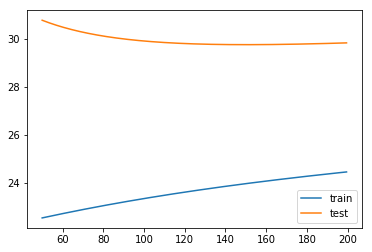

In [0]:
plt.plot(new_lambdas, train_score, label = 'train')
plt.plot(new_lambdas, test_score, label = 'test')
plt.legend() 

데이터를 조금 더 보기 쉬운 형태인 데이터프레임으로 변환해보았다. 

In [0]:
test_score=[]
train_score = []
li = []
kfold = KFold(n_splits=5)

for i in new_lambdas:
  reg = Ridge(alpha = i)
  temp = cross_validate(reg, X, y, cv = kfold,
                        scoring = 'neg_mean_squared_error',
                        return_train_score = True)
  li.append([i,-1 * temp['train_score'].mean(), -1 * temp['test_score'].mean() ])
  train_score.append(-1 * temp['train_score'].mean())
  test_score.append(-1 * temp['test_score'].mean())
    

In [0]:
li

In [0]:
df=pd.DataFrame(li)

In [0]:
df.columns = ["alpha", "train_score", "test_score"]

In [0]:
df.tail()

,alpha,train_score,test_score
295,197.5,24.438525,29.822664
296,198.0,24.442991,29.823940
297,198.5,24.447449,29.825224
298,199.0,24.451898,29.826516
299,199.5,24.456338,29.827816


In [0]:
df['test_score'].idxmin()

200

In [0]:
df.loc[df['test_score'].idxmin()]

alpha          150.000000
train_score     23.968879
test_score      29.753617
Name: 200, dtype: float64

**약 alpha값이 150일때가 최적이라 볼 수있다!!**

**4.적절한 lambda의 계수 확인**

In [0]:
rid150 = Ridge(alpha=150)
rid150.fit(X,y)
print(rid150.coef_)

[-0.1016  0.0552 -0.0528  0.4725 -0.1717  1.9454  0.0057 -1.1041  0.3234
 -0.0162 -0.832   0.0091 -0.6878]
